In [1]:
import gdal, gdalconst
from recon_lidar_error_stat import reproject_reconstruction
from matplotlib import pyplot as plt
import numpy as np
import os
%matplotlib inline

In [14]:
def HighResVeg2LowRes(src_fn, dst_fn, match_fn):
    """Array > Raster
    Save a raster from a C order array.

    :param array: ndarray
    """
    src_data = gdal.Open(src_fn)
    src_raster = src_data.ReadAsArray()
    src_raster[src_raster == -9999.] = np.nan
    tree_binary = src_raster >= 5.0
    
    src_shape = src_raster.shape
    
    geoTrans = src_data.GetGeoTransform()
    
    temp_fn = "3m_data/temp_veg.tif"
    temp = gdal.GetDriverByName('GTiff').Create(temp_fn, src_shape[1], src_shape[0], 1, gdalconst.GDT_Float32)
    temp.SetGeoTransform(src_data.GetGeoTransform())
    temp.SetProjection(src_data.GetProjection())
    
    temp_band = temp.GetRasterBand(1)
    temp_band.WriteArray(tree_binary)
    temp.FlushCache()
    
    reproject_reconstruction(temp_fn, match_fn, dst_fn, lidar=True)
    rm_cmd = "rm " + temp_fn
    os.system(rm_cmd)  

In [15]:
HighResVeg2LowRes("3m_data/Merced_vegetation_height_3p0m_EXPORT.tif", "3m_data/Merced_500m_VEG.tif", 
                  "3m_data/Merced_500m_DEM.tif")

In [17]:
HighResVeg2LowRes("3m_data/Merced_vegetation_height_3p0m_EXPORT.tif", "3m_data/Merced_1000m_VEG.tif",
                  "3m_data/Merced_1000m_DEM.tif")

In [18]:
HighResVeg2LowRes("3m_data/Tuolumne_vegetation_height_3p0m_EXPORT.tif", "3m_data/Tuolumne_500m_VEG.tif",
                  "3m_data/Tuolumne_500m_DEM.tif")
HighResVeg2LowRes("3m_data/Tuolumne_vegetation_height_3p0m_EXPORT.tif", "3m_data/Tuolumne_1000m_VEG.tif",
                  "3m_data/Tuolumne_1000m_DEM.tif")

In [3]:
vegetation_layer
merced_vegetation = gdal.Open("3m_data/Merced_vegetation_height_3p0m_EXPORT.tif")
merced_vegetation_raster = merced_vegetation.ReadAsArray()
merced_vegetation_georef = merced_vegetation.GetGeoTransform()

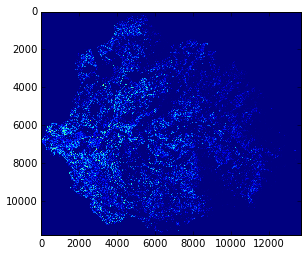

In [5]:
plt.imshow(merced_vegetation_raster, vmin=0, vmax=90)

In [6]:
print merced_vegetation_raster[0, 0]

-9999.0


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


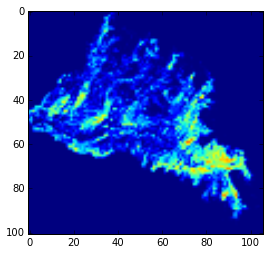

In [19]:
merced_veg_500m = gdal.Open("3m_data/Tuolumne_500m_VEG.tif").ReadAsArray()
print merced_veg_500m
plt.imshow(merced_veg_500m, vmin=0, vmax=1)

In [2]:
reproject_reconstruction("3m_data/Merced_vegetation_height_3p0m_EXPORT.tif", "3m_data/Merced_500m_DEM.tif", 
                         "3m_data/Merced_500m_CHM.tif", lidar=True)
reproject_reconstruction("3m_data/Tuolumne_vegetation_height_3p0m_EXPORT.tif", "3m_data/Tuolumne_500m_DEM.tif",
                         "3m_data/Tuolumne_500m_CHM.tif", lidar=True)